In [19]:
#Importing Python module used to read the datasets from csv files, and also build the neural network
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow._api.v2.compat.v1 as tf
import tensorflow.keras 
import warnings
warnings.filterwarnings("ignore")

In [20]:
cd C:\Users\Testys\Documents\Bank Subscription Prediction\Datasets

C:\Users\Testys\Documents\Bank Subscription Prediction\Datasets


In [21]:
import altair as alt

In [22]:
train= pd.read_csv('Train.csv')#reads training datasets 
test= pd.read_csv('Test.csv')#test datasets
submission= pd.read_csv('SampleSubmission.csv')
train.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,...,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,ID_4A9AR6FQ,1955,Graduation,Divorced,77504.4,1,1,22-06-2014,56,2,...,6,20,3,0,0,0,0,0,0,0
1,ID_X28T3VEK,1958,Graduation,Together,56784.0,0,1,01-08-2013,17,6,...,15,19,6,0,0,0,0,0,0,0
2,ID_AWXARH57,1962,Graduation,Single,103714.8,0,0,21-11-2013,17,0,...,18,37,2,0,0,0,1,0,0,1
3,ID_FQVZHE81,1979,2n Cycle,Single,46311.6,1,0,13-09-2013,49,3,...,24,24,8,0,0,0,0,0,0,0
4,ID_QVLWGPRN,1959,Graduation,Married,87486.0,0,0,21-01-2014,59,1,...,165,203,1,0,0,0,1,0,0,0


In [23]:
train.info()
#getting some necessary information on the datasets 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1568 non-null   object 
 1   Year_of_Birth            1568 non-null   int64  
 2   Education_Level          1568 non-null   object 
 3   Marital_Status           1568 non-null   object 
 4   Disposable_Income        1552 non-null   float64
 5   No_of_Kids_in_home       1568 non-null   int64  
 6   No_of_Teen_in_home       1568 non-null   int64  
 7   Date_Customer            1568 non-null   object 
 8   Recency                  1568 non-null   int64  
 9   Discounted_Purchases     1568 non-null   int64  
 10  WebPurchases             1568 non-null   int64  
 11  CatalogPurchases         1568 non-null   int64  
 12  StorePurchases           1568 non-null   int64  
 13  Amount_on_Wines          1568 non-null   int64  
 14  Amount_on_Fruits        

In [24]:
train.isnull().sum()# checking for missing values in the train datasets

ID                          0
Year_of_Birth               0
Education_Level             0
Marital_Status              0
Disposable_Income          16
No_of_Kids_in_home          0
No_of_Teen_in_home          0
Date_Customer               0
Recency                     0
Discounted_Purchases        0
WebPurchases                0
CatalogPurchases            0
StorePurchases              0
Amount_on_Wines             0
Amount_on_Fruits            0
Amount_on_MeatProducts      0
Amount_on_FishProducts      0
Amount_on_SweetProducts     0
Amount_on_GoldProds         0
WebVisitsMonth              0
Cmp3Accepted                0
Cmp4Accepted                0
Cmp5Accepted                0
Cmp1Accepted                0
Cmp2Accepted                0
Any_Complain                0
Response                    0
dtype: int64

In [25]:
test.isnull().sum()#checking for missing values in the test data.

ID                         0
Year_of_Birth              0
Education_Level            0
Marital_Status             0
Disposable_Income          8
No_of_Kids_in_home         0
No_of_Teen_in_home         0
Date_Customer              0
Recency                    0
Discounted_Purchases       0
WebPurchases               0
CatalogPurchases           0
StorePurchases             0
Amount_on_Wines            0
Amount_on_Fruits           0
Amount_on_MeatProducts     0
Amount_on_FishProducts     0
Amount_on_SweetProducts    0
Amount_on_GoldProds        0
WebVisitsMonth             0
Cmp3Accepted               0
Cmp4Accepted               0
Cmp5Accepted               0
Cmp1Accepted               0
Cmp2Accepted               0
Any_Complain               0
dtype: int64

In [26]:
train.Disposable_Income.fillna(train.Disposable_Income.median(), inplace= True)
#filling missing values from Disposable Income with median values 

In [27]:
test.Disposable_Income.fillna(train.Disposable_Income.median(), inplace=True)
#filling the missing values from Disposable Income with the median values 

In [28]:
train.Response.unique()#getting unique values for the Response(Target column) column.

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='Response', ylabel='count'>

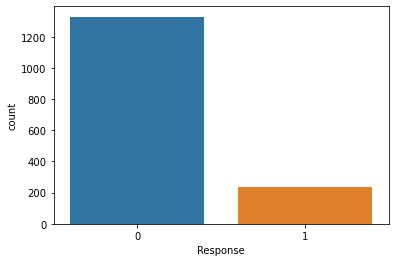

In [29]:
sns.countplot(x=train.Response)
#a plot to show the balance between the unique value of the Response column

['Divorced' 'Together' 'Single' 'Married' 'Widow' 'Alone' 'Absurd' 'YOLO']


<AxesSubplot:xlabel='Marital_Status', ylabel='CatalogPurchases'>

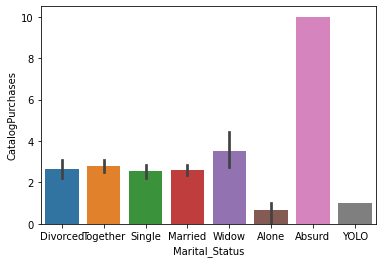

In [30]:
print(train.Marital_Status.unique())
sns.barplot(x= train.Marital_Status, y= train.CatalogPurchases)

In [34]:
train.Amount_on_FishProducts.nunique() == 2

False

In [112]:
count_col = []
for col in train.columns:
    if (train[col].nunique()< 3) == True:
            count_col.append(col)
    else:
        print("Not Available")

Not Available
Not Available
Not Available
Not Available
Not Available
Not Available
Not Available
Not Available
Not Available
Not Available
Not Available
Not Available
Not Available
Not Available
Not Available
Not Available
Not Available
Not Available
Not Available
Not Available


In [ ]:
#In this section, I would be converting the Date Customer column to a datetime dtype. 
train.Date_Customer= pd.to_datetime(train.Date_Customer, errors= 'coerce')
test.Date_Customer= pd.to_datetime(test.Date_Customer, errors= 'coerce')

In [ ]:
# I also created new features/columns for the train datasets  from the Date customer column.
train['Date_Customer_year']=train.Date_Customer.dt.year #year the customer subscribed with the bank
train['Date_Customer_month']= train.Date_Customer.dt.month #month the customer subscribed with the bank.
train['Date_Customer_day']= train.Date_Customer.dt.day #day of the month the customer subscribed to the bank.
train

In [ ]:
# I also created new features/columns for the test datasets  from the Date customer column.
test['Date_Customer_year']=test.Date_Customer.dt.year #year the customer subscribed with the bank
test['Date_Customer_month']= test.Date_Customer.dt.month #month the customer subscribed with the bank
test['Date_Customer_day']= test.Date_Customer.dt.day #day of the month the customer subscribed with the bank
test


In [ ]:
#Then I dropped the columns that will not be required for training and test.
first_train= train.drop(['ID', 'Date_Customer'], axis=1)
first_test= test.drop(['ID', 'Date_Customer'], axis=1)
first_train.head()

In [ ]:
s= (first_train.dtypes== 'object') #this is used to get the columns with the object datatype.
obj_col= list(s[s].index) #the list of columns with object dtype is stored under the obj_col.

In [ ]:
#importing the ordinal encoder used in encoding the categorical columns in this case.
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import f1_score #importing the evaluation metric to be used to know the accuracy.
copied_f_train= first_train.copy()#making a copy of the processed train data
copied_f_test= first_test.copy() #making a copy of the test data.

In [ ]:
ordEncode= OrdinalEncoder() #calling the ordinal encoder.

In [ ]:
copied_f_train[obj_col]= ordEncode.fit_transform(first_train[obj_col])#fitting and transforming the train dataset using the ordinal encoder
copied_f_test[obj_col]= ordEncode.fit_transform(first_test[obj_col]) #the same is done to the test data

In [ ]:
X= copied_f_train.drop('Response', axis=1) #Dropping the target(Response) from the features which are stored in X
y= copied_f_train.Response# storing the target in y 

In [ ]:
from imblearn.over_sampling import SMOTE 
#Due to us having an imbalanced dataset, I carried out the oversampling on the dataset in order to get more values of y.

In [ ]:
over = SMOTE(sampling_strategy= 0.8) #I used the SMOTE method from the imbearn module in doing the oversampling.

In [ ]:
X,y = over.fit_resample(X,y)# then I fitted the features and the target using the SMOTE methods

In [ ]:
from collections import Counter 
counter = Counter(y) # I used the counter to get the ratio of 0 to 1

In [ ]:
counter[1]

In [ ]:
#In this section, I would be using the Stratified KFOLD for cross validation on the data 
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle= True) #I splitted my data into 10 split

In [ ]:
# X is the feature set and y is the target
for train_index, val_index in skf.split(X,y): 
    print("Train:", train_index, "Validation:",val_index) 
    X_train, X_val = X.loc[train_index], X.loc[val_index] 
    y_train, y_val = y.loc[train_index], y.loc[val_index] # It gives an output for my X_train, X_val, y_train, y_val.

In [ ]:
#Importing modules for creating the deep neural network
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [ ]:
X_train.shape[1]#input_shape for the neural net.

In [ ]:
#
model = tf.keras.Sequential([
    layers.BatchNormalization(input_shape= [27]),
    layers.Dense(units=27,),
    layers.Dropout(rate=0.2),
    layers.BatchNormalization(),
    layers.Dense(units=18, ),
    layers.Dropout(rate=0.5),
    layers.BatchNormalization(),
    layers.Dense(units= 9, ),
    layers.Dropout(rate=0.5),
    layers.BatchNormalization(),
    layers.Dense(units= 6,),
    layers.Dropout(rate=0.2),
    layers.BatchNormalization(),
    layers.Dense(units=3, activation='relu'),
    layers.Dropout(rate=0.3),
    layers.Dense(units=1, activation='sigmoid')
])

In [ ]:
model.compile( 
    optimizer= 'sgd',
    loss= 'binary_crossentropy',
    metrics= ['accuracy']

)

In [ ]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    min_delta= 0.001,
    patience= 15,
    restore_best_weights= True
)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=256,
    epochs=300,
    callbacks=[early_stopping],
)

In [ ]:
p = model.predict(X_val)

In [ ]:
p
final= []

In [ ]:
for x in p:
    if x > 0.4:
        final.append(1)
    else:
        final.append(0)


In [ ]:
p

In [ ]:
final.count(1)

In [ ]:
f1_score(final, y_val)

In [ ]:
deep= model.predict(copied_f_test)

In [ ]:
finalresults= []
deep1= []

In [ ]:
for x in deep:
    if x > 0.4:
        deep1.append(1)
    else:
        deep1.append(0)

In [ ]:
deep1.count(1)

In [ ]:
cd C:\Users\Testys\Documents\Bank Subscription Prediction\Prediction results for each notebooks

In [ ]:
submission.Response = deep1
submission.to_csv("deepsub", index= False)

In [ ]:
!